# Analysis of the Results

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Loading data from output file and preprocessing it

In [2]:
# Loading output of GA algorithms from file
file_path = "output/10_runs.csv"

results_df = pd.read_csv(file_path)
results_df.head(10)

,run_number,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,best_fitness_lst
0,1,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.520966649055481, 0.8256333470344543, 0.8726..."
1,2,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.6210333108901978, 0.7003833055496216, 0.711..."
2,3,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.8732666373252869, 0.8732666373252869, 0.888..."
3,4,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.8491833209991455, 0.8716833591461182, 0.871..."
4,5,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.5286833047866821, 0.5286833047866821, 0.550..."
5,6,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.3292166590690613, 0.6103333234786987, 0.615..."
6,7,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.41644999384880066, 0.8111666440963745, 0.81..."
7,8,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.3793500065803528, 0.4624499976634979, 0.495..."
8,9,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.7437833547592163, 0.840499997138977, 0.8657..."
9,10,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.522350013256073, 0.9401500225067139, 0.9401..."


In [3]:
# Filling NaN values for 'torun_size' with "n/a" (will be useful for further grouping)
results_df = results_df.fillna({'tourn_size': 'n/a'})

# Convert string representation of arrays to actual arrays
results_df['best_fitness_lst'] = results_df['best_fitness_lst'].str.strip('[]').str.split(',').apply(lambda x: [float(val) for val in x])

## Calculating ABF

In [4]:
############## CALCULATING ABF ##############

# Grouping runs of a certain configuration
configuration_columns = ["total_runs", "pop_size", "gens", "select", "crossover", "mutate", 
                         "xo_prob", "mut_prob", "tourn_size"]

# Group by the specified columns and calculate the mean values of arrays
grouped_ave = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result = grouped_ave.reset_index()
result = result.rename(columns={'best_fitness_lst': 'ABF'})

result

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648..."
1,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763..."
2,10,20,20,fps,single_point_co,arithmetic_mutation,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686..."
3,10,20,20,fps,single_point_co,inversion_mutation,0.9,0.1,n/a,"[0.65849499553442, 0.7201600030064583, 0.76523..."
4,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.6043449968099595, 0.6754933387041092, 0.713..."
5,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.5784283250570297, 0.7464249938726425, 0.762..."
6,10,20,20,tournament_sel,arithmetic_xo,inversion_mutation,0.9,0.1,2.0,"[0.646314999461174, 0.7721199929714203, 0.7870..."
7,10,20,20,tournament_sel,arithmetic_xo,inversion_mutation,0.9,0.1,4.0,"[0.7150183379650116, 0.7595249950885773, 0.800..."
8,10,20,20,tournament_sel,single_point_co,arithmetic_mutation,0.9,0.1,2.0,"[0.5327516615390777, 0.6340549975633621, 0.656..."
9,10,20,20,tournament_sel,single_point_co,arithmetic_mutation,0.9,0.1,4.0,"[0.6790050029754638, 0.725896668434143, 0.7582..."


## Calculating Srandard Deviations

In [5]:
############## CALCULATING Srandard Deviations ##############

# Group by the specified columns and calculate the mean values of arrays
grouped_std = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.std(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result_std = grouped_std.reset_index()
result_std = result_std.rename(columns={'best_fitness_lst': 'std'})

# Merge result_std to result:
merged_df = pd.merge(result, result_std, on=configuration_columns, how='inner')
merged_df

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,std
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...","[0.12389307381299128, 0.13062743600719084, 0.1..."
1,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...","[0.16026291236956597, 0.15929115809145664, 0.1..."
2,10,20,20,fps,single_point_co,arithmetic_mutation,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686...","[0.1974594520689028, 0.18164888743676597, 0.16..."
3,10,20,20,fps,single_point_co,inversion_mutation,0.9,0.1,n/a,"[0.65849499553442, 0.7201600030064583, 0.76523...","[0.22599172427064368, 0.20946160619242807, 0.2..."
4,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.6043449968099595, 0.6754933387041092, 0.713...","[0.20512336932987502, 0.16443912283519313, 0.1..."
5,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.5784283250570297, 0.7464249938726425, 0.762...","[0.18063559126388054, 0.1540511017422858, 0.15..."
6,10,20,20,tournament_sel,arithmetic_xo,inversion_mutation,0.9,0.1,2.0,"[0.646314999461174, 0.7721199929714203, 0.7870...","[0.19800148908368653, 0.13412002871296255, 0.1..."
7,10,20,20,tournament_sel,arithmetic_xo,inversion_mutation,0.9,0.1,4.0,"[0.7150183379650116, 0.7595249950885773, 0.800...","[0.1553996862788998, 0.13245106878243257, 0.11..."
8,10,20,20,tournament_sel,single_point_co,arithmetic_mutation,0.9,0.1,2.0,"[0.5327516615390777, 0.6340549975633621, 0.656...","[0.18337485288030125, 0.1683494215871963, 0.14..."
9,10,20,20,tournament_sel,single_point_co,arithmetic_mutation,0.9,0.1,4.0,"[0.6790050029754638, 0.725896668434143, 0.7582...","[0.174251904999426, 0.1705664245392454, 0.1635..."


## Visualizing Results for Different GA Configurations

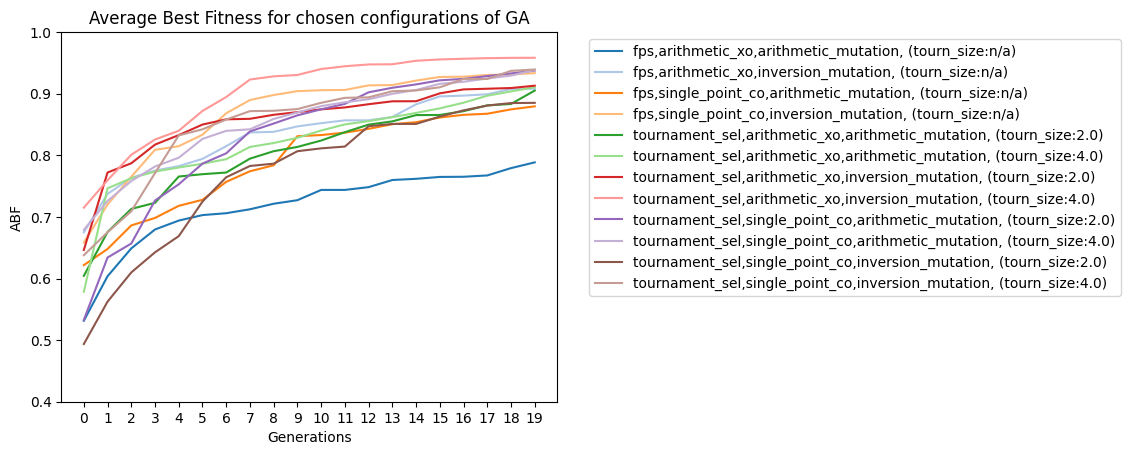

In [6]:
fig, ax = plt.subplots()

colormap = plt.colormaps['tab20']  # setting the colormap preference 

for index, row in merged_df.iterrows():
    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
ax.set_ylim([0.4, 1])
ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_title('Average Best Fitness for chosen configurations of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

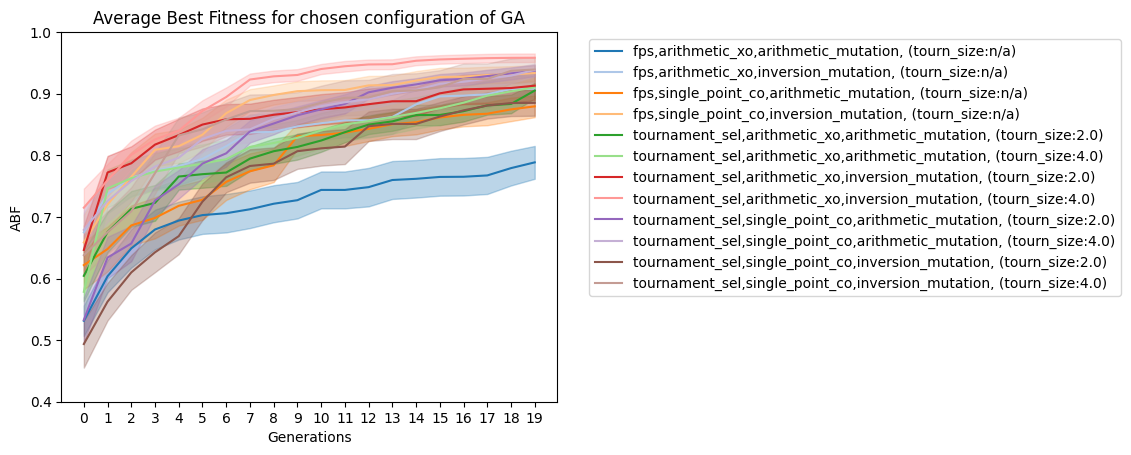

In [7]:
fig, ax = plt.subplots()

for index, row in merged_df.iterrows():
    upper_bound = row['ABF'] + 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2
    lower_bound = row['ABF'] - 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2

    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    ax.fill_between(range(len(row['ABF'])),lower_bound, upper_bound, alpha=0.3,
                    color=colormap(index % colormap.N))
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))

ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_ylim([0.4, 1])
ax.set_title('Average Best Fitness for chosen configuration of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [8]:
# To transform the dataframe into a new configuration:
merged_df['tourn_size'] = merged_df['tourn_size'].astype('string')

In [9]:
# Combine 'selection' and 'crossover' into one column
merged_df['combined'] = merged_df['select'] + merged_df['crossover'] + merged_df['mutate'] + merged_df['tourn_size']

# Initialize the new DataFrame
new_df = pd.DataFrame()

# For each unique combination, create a new column in the new DataFrame
for combo in merged_df['combined'].unique():
    # Get the 'ABF' values for this combination, reset the index, and drop the old index
    temp_df = merged_df.loc[merged_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
    # Transpose the DataFrame so each value in 'ABF' becomes a separate row
    temp_df = temp_df.T
    # Add this DataFrame to the new DataFrame, using the combo as the column name
    new_df[combo] = temp_df[0]


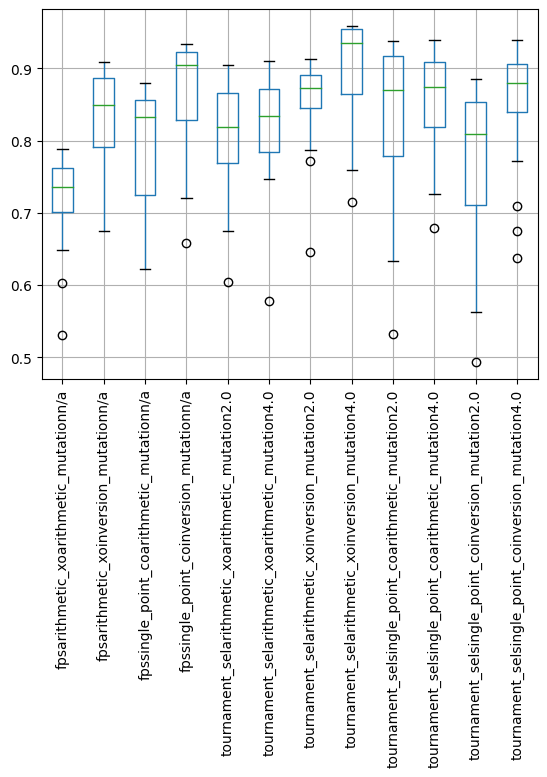

In [10]:
new_df.boxplot()
plt.xticks(rotation='vertical')
plt.show()

## Comparison of Parameters

In [11]:
merged_df.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,std,combined
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...","[0.12389307381299128, 0.13062743600719084, 0.1...",fpsarithmetic_xoarithmetic_mutationn/a
1,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...","[0.16026291236956597, 0.15929115809145664, 0.1...",fpsarithmetic_xoinversion_mutationn/a
2,10,20,20,fps,single_point_co,arithmetic_mutation,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686...","[0.1974594520689028, 0.18164888743676597, 0.16...",fpssingle_point_coarithmetic_mutationn/a
3,10,20,20,fps,single_point_co,inversion_mutation,0.9,0.1,n/a,"[0.65849499553442, 0.7201600030064583, 0.76523...","[0.22599172427064368, 0.20946160619242807, 0.2...",fpssingle_point_coinversion_mutationn/a
4,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.6043449968099595, 0.6754933387041092, 0.713...","[0.20512336932987502, 0.16443912283519313, 0.1...",tournament_selarithmetic_xoarithmetic_mutation2.0


In [15]:
# Splitting ABF into 20 new columns corresponding to 20 generations
new_cols = pd.DataFrame(merged_df['ABF'].apply(pd.Series).values.tolist(), 
                        columns=['Gen'+str(i+1) for i in range(20)])

# Concatenate the new columns to merged_df
merged_df = pd.concat([merged_df, new_cols], axis=1)
merged_df.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,...,Gen11,Gen12,Gen13,Gen14,Gen15,Gen16,Gen17,Gen18,Gen19,Gen20
0,10,20,20,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...",...,0.743832,0.743832,0.748338,0.759932,0.761863,0.764922,0.765192,0.767358,0.779217,0.788570
1,10,20,20,fps,arithmetic_xo,inversion_mutation,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...",...,0.852200,0.856785,0.856785,0.862297,0.882768,0.895658,0.896907,0.899138,0.907612,0.908160
2,10,20,20,fps,single_point_co,arithmetic_mutation,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686...",...,0.832905,0.836842,0.842990,0.850523,0.853725,0.861413,0.865738,0.867522,0.874590,0.879480
3,10,20,20,fps,single_point_co,inversion_mutation,0.9,0.1,n/a,"[0.65849499553442, 0.7201600030064583, 0.76523...",...,0.905717,0.906105,0.913535,0.914065,0.921323,0.927182,0.927637,0.930425,0.931238,0.933522
4,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.6043449968099595, 0.6754933387041092, 0.713...",...,0.824003,0.837518,0.849843,0.855095,0.865308,0.865508,0.871667,0.881100,0.883352,0.905148


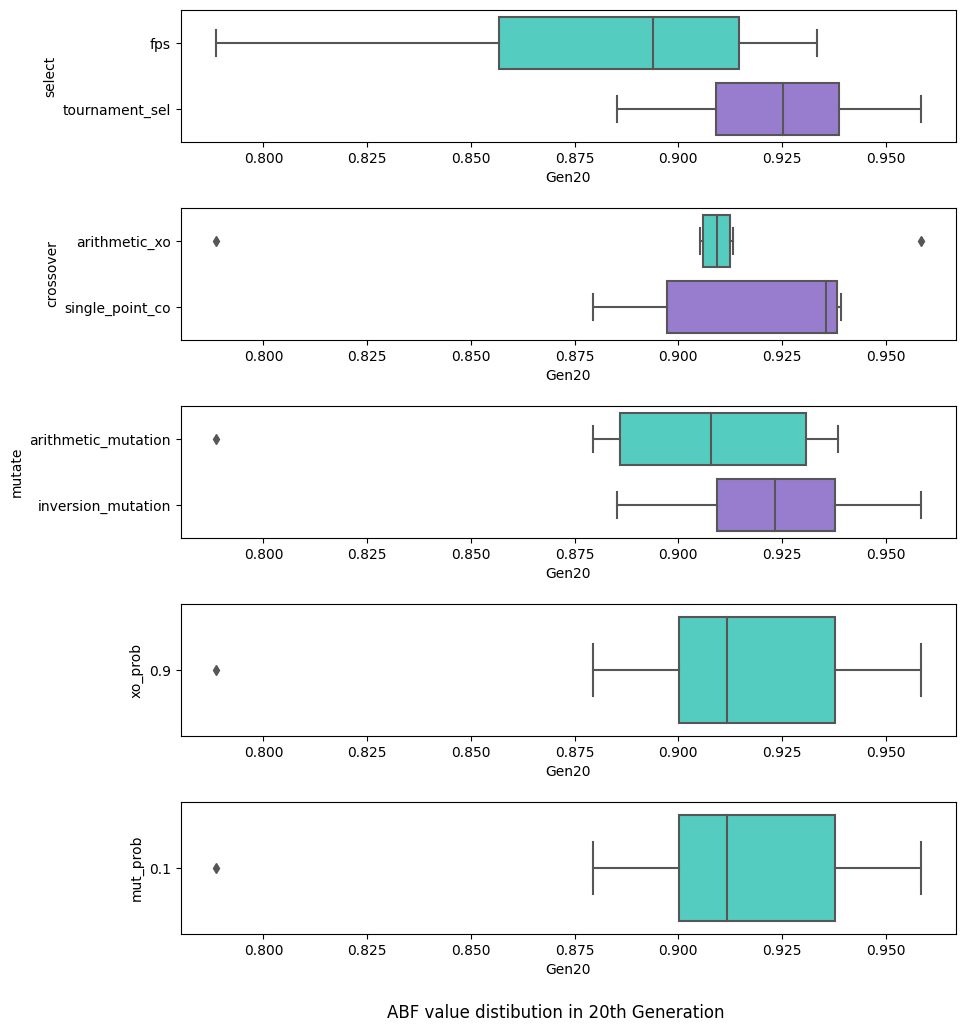

In [24]:
f, axes = plt.subplots(5, figsize = (10, 12))

# Define and set custom color palette
custom_palette = ["#40E0D0", "#9370DB", "#FFD700", "#00FF00", "#FF7F50"]
sns.set_palette(custom_palette)

sns.boxplot(x="Gen20", y="select", orient="h", data = merged_df, ax=axes[0])
sns.boxplot(x="Gen20", y="crossover", orient="h", data = merged_df, ax=axes[1])
sns.boxplot(x="Gen20", y="mutate", orient="h", data = merged_df, ax=axes[2])
sns.boxplot(x="Gen20", y="xo_prob", orient="h", data = merged_df, ax=axes[3])
sns.boxplot(x="Gen20", y="mut_prob", orient="h", data = merged_df, ax=axes[4])

plt.subplots_adjust(hspace=0.5) # adjusting subplot spacing
f.text(0.5, 0.04, "ABF value distibution in 20th Generation", ha="center", fontsize=12) # Set x-axis label for all subplots
plt.show() 